In [1]:
# 데이터 출처 https://www.kaggle.com/datasets/podsyp/production-quality?resource=download&select=data_X.csv

# 필요한 모듈 및 패키지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [2]:
# Feature
# 5 챔버. 챔버 당 온도 센서 3개. 원료 투입 시 원료 높이(H) 및 습도(AH) 측정.
data_X = pd.read_csv('data_X.csv')
data_X

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103836,2018-12-31 23:56:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,157.20,8.44
2103837,2018-12-31 23:57:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.40,8.44
2103838,2018-12-31 23:58:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.14,8.44
2103839,2018-12-31 23:59:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,162.96,8.44


In [3]:
# 종속 변수
data_Y = pd.read_csv('data_Y.csv')
data_Y

,date_time,quality
0,2015-01-04 00:05:00,392
1,2015-01-04 01:05:00,384
2,2015-01-04 02:05:00,393
3,2015-01-04 03:05:00,399
4,2015-01-04 04:05:00,400
...,...,...
29179,2018-05-03 19:05:00,438
29180,2018-05-03 20:05:00,452
29181,2018-05-03 21:05:00,455
29182,2018-05-03 22:05:00,455


In [4]:
# AH는 60분마다 바뀐다. 각 Batch를 구분하는 기준으로 사용할 수 있을 것 같다.
# 15년 1월 3일 23시 정각에 투입된 원료가 60분 간 로스팅 기기 안에서 가공된 뒤 배출된다고 가정했다.
# 배출된 가공품의 샘플 결과는 15년 1월 4일 0시 5분에 기록되었다고 가정했다.
data_X = data_X.drop(data_X.index[:4260], axis = 0) # y값 없는 행 drop
data_X = data_X.drop(data_X.index[1751040:], axis = 0) # y값 없는 행 drop
data_X

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
4260,2015-01-03 23:00:00,265,337,263,335,326,340,493,497,527,316,343,336,234,239,237,157.37,4.73
4261,2015-01-03 23:01:00,265,337,263,335,326,341,494,497,529,316,343,336,234,238,237,152.83,4.73
4262,2015-01-03 23:02:00,265,337,263,335,326,341,494,497,530,316,344,336,234,238,238,156.82,4.73
4263,2015-01-03 23:03:00,266,338,263,335,326,341,495,497,532,316,345,336,234,238,238,154.81,4.73
4264,2015-01-03 23:04:00,266,338,263,335,326,341,495,497,534,316,346,336,234,238,238,154.92,4.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755295,2018-05-03 22:55:00,253,257,256,350,350,356,448,448,439,348,345,341,256,267,246,153.40,8.90
1755296,2018-05-03 22:56:00,253,257,256,350,350,356,448,449,439,348,345,340,256,267,246,158.97,8.90
1755297,2018-05-03 22:57:00,253,257,256,350,350,356,449,449,439,347,345,339,256,267,246,156.20,8.90
1755298,2018-05-03 22:58:00,253,257,256,350,350,356,449,450,439,347,344,338,256,267,246,157.49,8.90


In [5]:
data_X.describe()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
count,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06,1.751040e+06
mean,2.500338e+02,2.498073e+02,2.501298e+02,3.497861e+02,3.497509e+02,3.499783e+02,5.011803e+02,5.008918e+02,5.012868e+02,3.489424e+02,3.489795e+02,3.496608e+02,2.498223e+02,2.496555e+02,2.498308e+02,1.747234e+02,7.500540e+00
std,3.233198e+01,3.048670e+01,3.062275e+01,4.367175e+01,4.142574e+01,3.796144e+01,6.239390e+01,6.448022e+01,6.144491e+01,3.882963e+01,4.021407e+01,3.971015e+01,3.075789e+01,3.058694e+01,3.066571e+01,1.440935e+01,1.146908e+00
min,-1.980000e+02,-1.220000e+02,-1.070000e+02,-7.030000e+02,-9.580000e+02,-1.910000e+02,-6.070000e+02,-7.590000e+02,-4.490000e+02,-5.140000e+02,-4.710000e+02,-6.090000e+02,-8.900000e+01,-1.250000e+02,-1.300000e+02,1.414900e+02,3.120000e+00
25%,2.280000e+02,2.280000e+02,2.290000e+02,3.280000e+02,3.280000e+02,3.280000e+02,4.640000e+02,4.630000e+02,4.640000e+02,3.270000e+02,3.270000e+02,3.270000e+02,2.290000e+02,2.290000e+02,2.290000e+02,1.624800e+02,6.730000e+00
50%,2.500000e+02,2.500000e+02,2.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,5.020000e+02,5.020000e+02,5.020000e+02,3.490000e+02,3.490000e+02,3.490000e+02,2.500000e+02,2.500000e+02,2.500000e+02,1.743400e+02,7.510000e+00
75%,2.720000e+02,2.710000e+02,2.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,5.380000e+02,5.370000e+02,5.380000e+02,3.710000e+02,3.710000e+02,3.720000e+02,2.710000e+02,2.710000e+02,2.710000e+02,1.869800e+02,8.280000e+00
max,7.240000e+02,5.730000e+02,6.650000e+02,1.302000e+03,1.179000e+03,8.890000e+02,1.587000e+03,2.505000e+03,1.319000e+03,1.177000e+03,1.244000e+03,9.440000e+02,9.050000e+02,7.380000e+02,6.240000e+02,2.078300e+02,1.162000e+01


In [6]:
data_Y.describe()

,quality
count,29184.000000
mean,402.800747
std,46.273228
min,221.000000
25%,372.000000
50%,408.000000
75%,439.000000
max,505.000000


In [7]:
# data_X[0:60] # 정각부터 59분까지

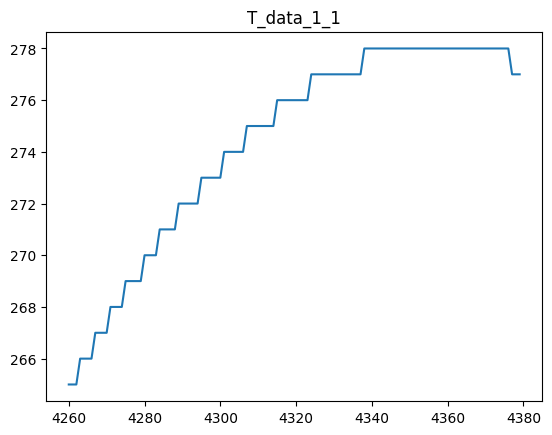

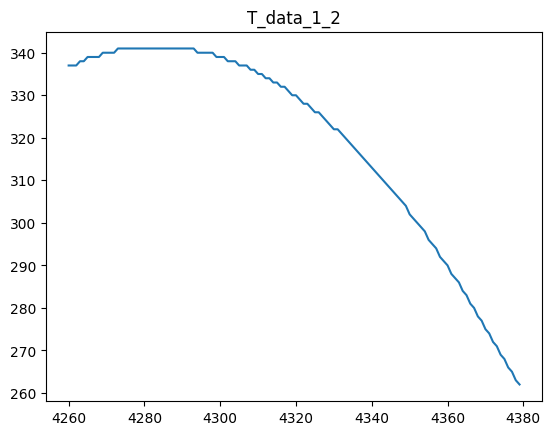

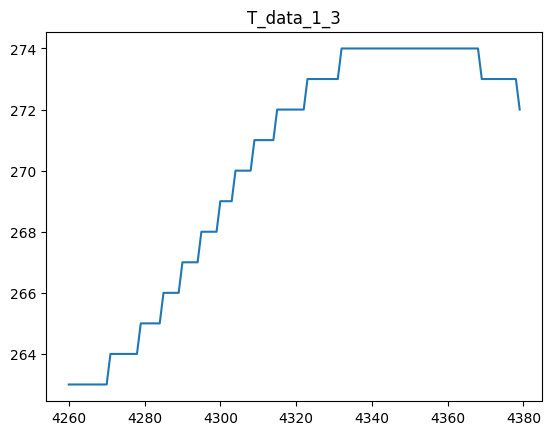

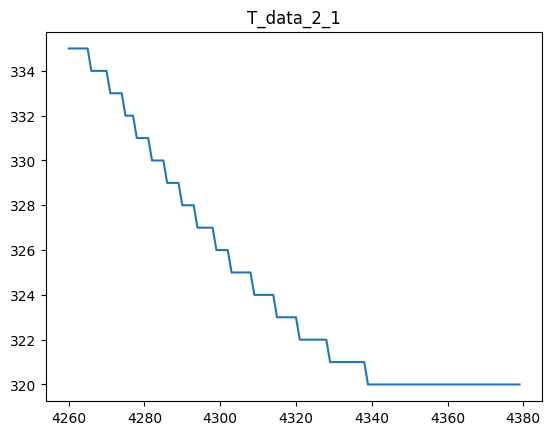

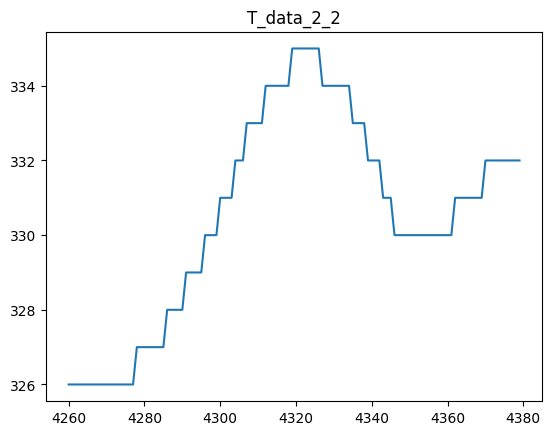

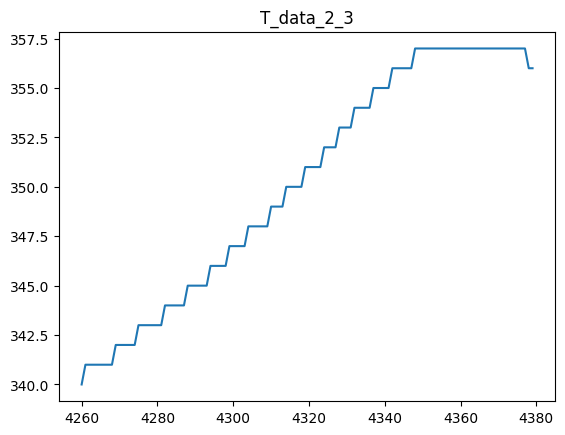

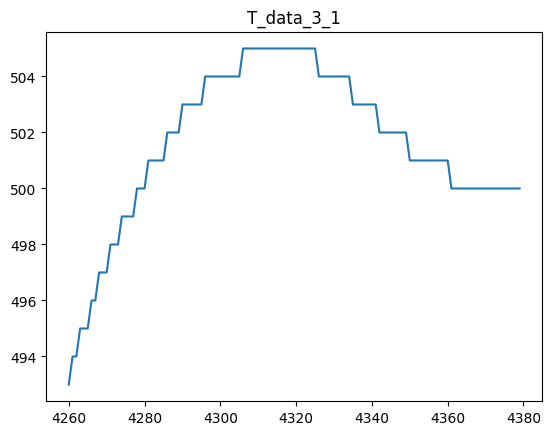

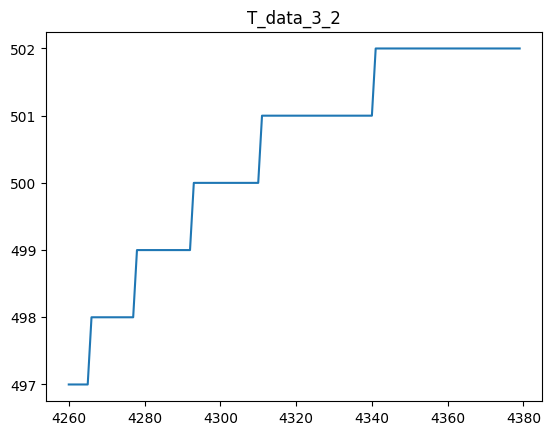

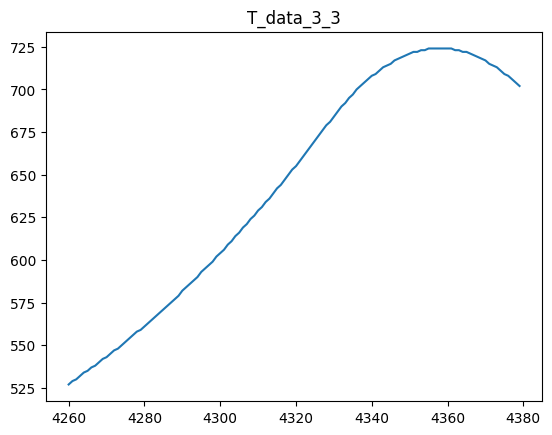

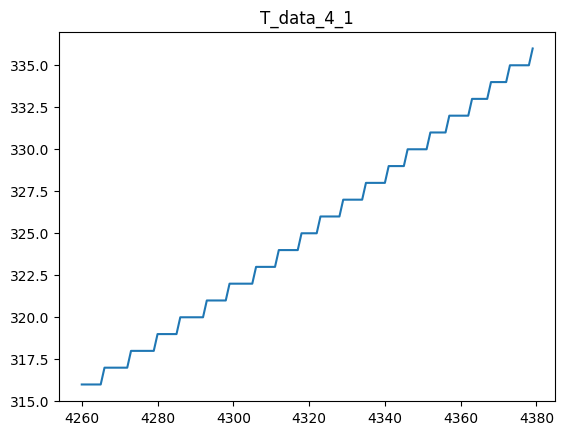

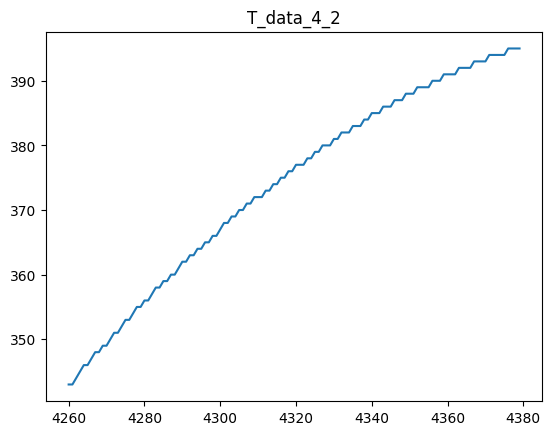

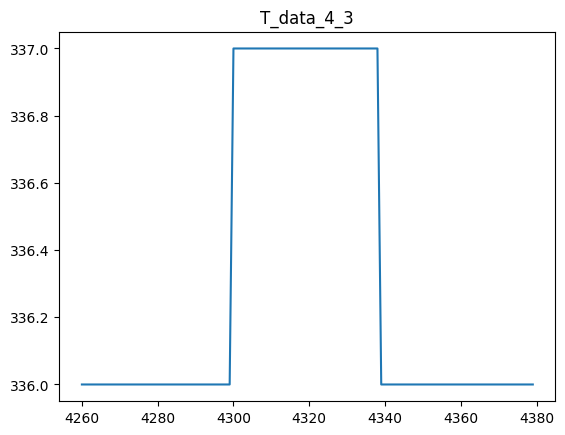

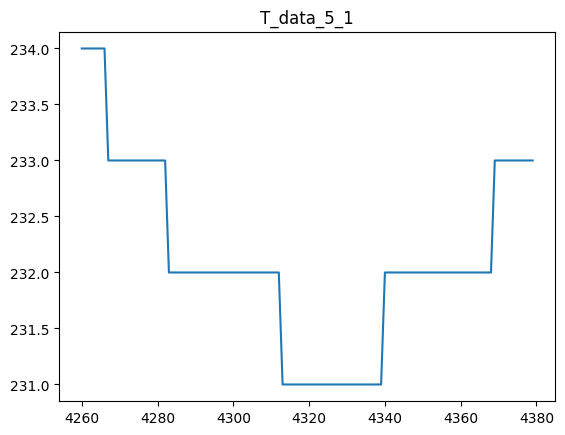

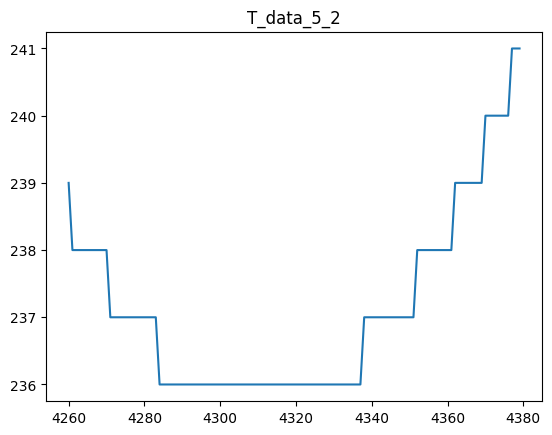

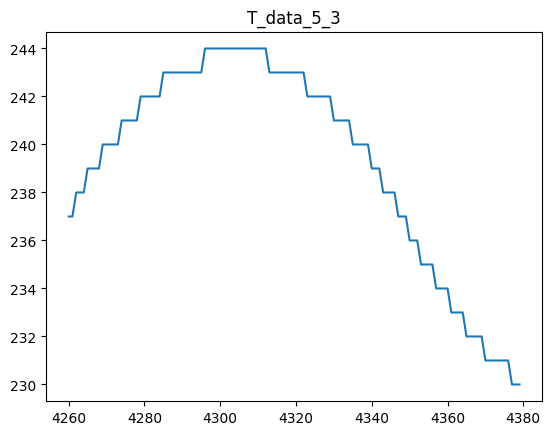

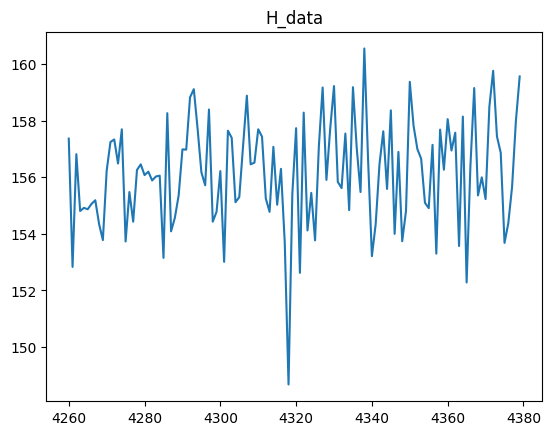

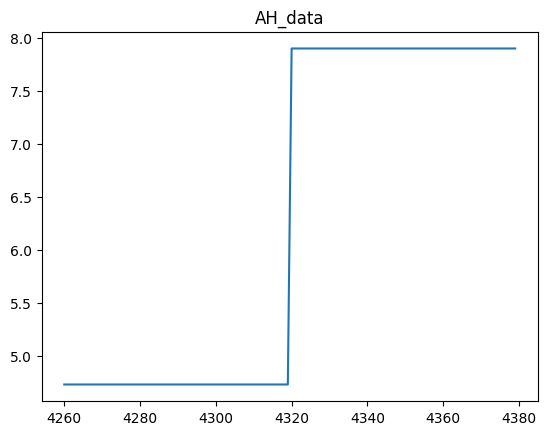

In [8]:
collist = data_X.columns.tolist()
collist = collist[1:] # date_time 제외
for i in collist:
    plt.plot(data_X[f'{i}'][0:120])
    plt.title(f'{i}')
    plt.show() # 열마다 보기

In [9]:
data_X["date_time"] = pd.to_datetime(data_X["date_time"])
data_X["date_hour"] = data_X["date_time"].apply(lambda x: x.strftime("%Y-%m-%d-%H"))
data_X

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,date_hour
4260,2015-01-03 23:00:00,265,337,263,335,326,340,493,497,527,316,343,336,234,239,237,157.37,4.73,2015-01-03-23
4261,2015-01-03 23:01:00,265,337,263,335,326,341,494,497,529,316,343,336,234,238,237,152.83,4.73,2015-01-03-23
4262,2015-01-03 23:02:00,265,337,263,335,326,341,494,497,530,316,344,336,234,238,238,156.82,4.73,2015-01-03-23
4263,2015-01-03 23:03:00,266,338,263,335,326,341,495,497,532,316,345,336,234,238,238,154.81,4.73,2015-01-03-23
4264,2015-01-03 23:04:00,266,338,263,335,326,341,495,497,534,316,346,336,234,238,238,154.92,4.73,2015-01-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755295,2018-05-03 22:55:00,253,257,256,350,350,356,448,448,439,348,345,341,256,267,246,153.40,8.90,2018-05-03-22
1755296,2018-05-03 22:56:00,253,257,256,350,350,356,448,449,439,348,345,340,256,267,246,158.97,8.90,2018-05-03-22
1755297,2018-05-03 22:57:00,253,257,256,350,350,356,449,449,439,347,345,339,256,267,246,156.20,8.90,2018-05-03-22
1755298,2018-05-03 22:58:00,253,257,256,350,350,356,449,450,439,347,344,338,256,267,246,157.49,8.90,2018-05-03-22


In [10]:
data_X = data_X.drop("date_time", axis = 1)
data_X

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,date_hour
4260,265,337,263,335,326,340,493,497,527,316,343,336,234,239,237,157.37,4.73,2015-01-03-23
4261,265,337,263,335,326,341,494,497,529,316,343,336,234,238,237,152.83,4.73,2015-01-03-23
4262,265,337,263,335,326,341,494,497,530,316,344,336,234,238,238,156.82,4.73,2015-01-03-23
4263,266,338,263,335,326,341,495,497,532,316,345,336,234,238,238,154.81,4.73,2015-01-03-23
4264,266,338,263,335,326,341,495,497,534,316,346,336,234,238,238,154.92,4.73,2015-01-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755295,253,257,256,350,350,356,448,448,439,348,345,341,256,267,246,153.40,8.90,2018-05-03-22
1755296,253,257,256,350,350,356,448,449,439,348,345,340,256,267,246,158.97,8.90,2018-05-03-22
1755297,253,257,256,350,350,356,449,449,439,347,345,339,256,267,246,156.20,8.90,2018-05-03-22
1755298,253,257,256,350,350,356,449,450,439,347,344,338,256,267,246,157.49,8.90,2018-05-03-22


In [11]:
# 작업 중 센서별 출력값의 평균에 각 quality의 실제값을 레이블링
X_average = data_X.groupby('date_hour').mean()
X_average = X_average.reset_index()

merged_df = pd.concat([X_average, data_Y['quality']], axis=1, ignore_index=True)
merged_df.columns = list(X_average.columns) + ['quality']
merged_df

,date_hour,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,2015-01-03-23,271.216667,338.450000,266.866667,328.800000,329.116667,345.083333,501.333333,499.200000,583.783333,320.116667,360.683333,336.333333,232.383333,236.600000,242.050000,155.854167,4.73,392
1,2015-01-04-00,277.583333,300.366667,273.550000,320.483333,331.966667,355.450000,501.900000,501.650000,705.516667,330.233333,387.133333,336.316667,231.850000,237.683333,236.516667,156.446500,7.90,384
2,2015-01-04-01,273.600000,231.833333,266.800000,322.700000,334.216667,347.133333,501.133333,500.366667,579.600000,341.550000,398.683333,334.350000,237.016667,245.683333,231.966667,156.000167,6.96,393
3,2015-01-04-02,250.333333,227.033333,256.350000,326.583333,333.666667,317.716667,511.183333,498.116667,492.366667,345.350000,395.066667,332.233333,248.850000,254.150000,244.783333,156.047000,7.29,399
4,2015-01-04-03,240.400000,239.350000,249.250000,325.750000,325.400000,310.500000,522.683333,498.966667,538.716667,341.283333,379.883333,337.816667,260.000000,260.516667,248.550000,188.481667,7.11,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29179,2018-05-03-18,256.166667,257.633333,265.583333,380.350000,385.800000,365.250000,441.450000,344.983333,463.733333,354.950000,353.966667,349.966667,238.650000,255.800000,257.583333,157.165000,7.79,438
29180,2018-05-03-19,258.183333,256.633333,259.933333,376.350000,376.350000,363.200000,448.050000,430.566667,457.583333,359.100000,346.066667,348.666667,232.700000,253.100000,249.550000,156.005833,7.33,452
29181,2018-05-03-20,259.866667,254.333333,259.366667,368.883333,359.183333,357.383333,427.350000,438.733333,449.700000,349.266667,348.866667,346.666667,242.850000,254.350000,246.216667,155.992000,7.87,455
29182,2018-05-03-21,258.866667,254.250000,263.133333,360.383333,349.933333,351.833333,432.900000,430.483333,443.633333,348.233333,355.283333,344.016667,251.100000,259.933333,247.666667,156.146667,7.65,455


In [12]:
collist = merged_df.columns.tolist()
collist

['date_hour',
 'T_data_1_1',
 'T_data_1_2',
 'T_data_1_3',
 'T_data_2_1',
 'T_data_2_2',
 'T_data_2_3',
 'T_data_3_1',
 'T_data_3_2',
 'T_data_3_3',
 'T_data_4_1',
 'T_data_4_2',
 'T_data_4_3',
 'T_data_5_1',
 'T_data_5_2',
 'T_data_5_3',
 'H_data',
 'AH_data',
 'quality']

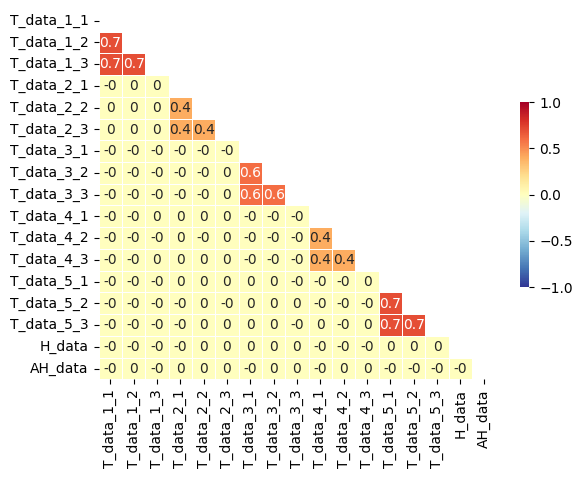

In [13]:
# Feature 간 상관관계 분석
heatmap = merged_df[collist[1:-1]]
correlation_matrix = heatmap.corr().round(1)
correlation_matrix

# sns.clustermap(correlation_matrix, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시)

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, cmap = 'RdYlBu_r', annot = True, mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1)  
plt.show()

In [14]:
# Target과 Feature의 상관관계 분석
heatmap = merged_df[collist[1:]]
correlation_matrix = heatmap.corr().round(1)
correlation_matrix

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
T_data_1_1,1.0,0.7,0.7,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.2
T_data_1_2,0.7,1.0,0.7,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.2
T_data_1_3,0.7,0.7,1.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.2
T_data_2_1,-0.0,0.0,0.0,1.0,0.4,0.4,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.1
T_data_2_2,0.0,0.0,0.0,0.4,1.0,0.4,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
T_data_2_3,0.0,0.0,0.0,0.4,0.4,1.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.1
T_data_3_1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.6,0.6,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.7
T_data_3_2,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.6,1.0,0.6,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.7
T_data_3_3,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.6,0.6,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.7
T_data_4_1,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,0.4,0.4,-0.0,-0.0,0.0,-0.0,-0.0,0.0


In [15]:
# Target과 관련 없는 Feature 제거
quality_row = correlation_matrix.iloc[-1]
columns_to_remove = quality_row[(quality_row == 0.0) | (quality_row == -0.0)].index

new_dataframe = merged_df.drop(columns_to_remove, axis=1)
new_dataframe

,date_hour,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,quality
0,2015-01-03-23,271.216667,338.450000,266.866667,328.800000,329.116667,345.083333,501.333333,499.200000,583.783333,232.383333,236.600000,242.050000,155.854167,392
1,2015-01-04-00,277.583333,300.366667,273.550000,320.483333,331.966667,355.450000,501.900000,501.650000,705.516667,231.850000,237.683333,236.516667,156.446500,384
2,2015-01-04-01,273.600000,231.833333,266.800000,322.700000,334.216667,347.133333,501.133333,500.366667,579.600000,237.016667,245.683333,231.966667,156.000167,393
3,2015-01-04-02,250.333333,227.033333,256.350000,326.583333,333.666667,317.716667,511.183333,498.116667,492.366667,248.850000,254.150000,244.783333,156.047000,399
4,2015-01-04-03,240.400000,239.350000,249.250000,325.750000,325.400000,310.500000,522.683333,498.966667,538.716667,260.000000,260.516667,248.550000,188.481667,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29179,2018-05-03-18,256.166667,257.633333,265.583333,380.350000,385.800000,365.250000,441.450000,344.983333,463.733333,238.650000,255.800000,257.583333,157.165000,438
29180,2018-05-03-19,258.183333,256.633333,259.933333,376.350000,376.350000,363.200000,448.050000,430.566667,457.583333,232.700000,253.100000,249.550000,156.005833,452
29181,2018-05-03-20,259.866667,254.333333,259.366667,368.883333,359.183333,357.383333,427.350000,438.733333,449.700000,242.850000,254.350000,246.216667,155.992000,455
29182,2018-05-03-21,258.866667,254.250000,263.133333,360.383333,349.933333,351.833333,432.900000,430.483333,443.633333,251.100000,259.933333,247.666667,156.146667,455


In [16]:
X = new_dataframe.drop(['quality', 'date_hour'], axis=1)
y = new_dataframe['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

threshold = 0.8
num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

print("Number of components:", num_components)

Number of components: 7


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

# Decision Tree Regression
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_reg_predictions = tree_reg.predict(X_test)
tree_reg_r2 = r2_score(y_test, tree_reg_predictions)

print("Linear Regression R-squared:", linear_reg_r2)
print("Decision Tree Regression R-squared:", tree_reg_r2)

Linear Regression R-squared: 0.7382649566307518
Decision Tree Regression R-squared: 0.7563739500012518
